# **Tutorial 7: Assessing Climate Forcings**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Mauro Tripaldi, Chi Zhang, Ohad Zivan 

**Content editors:** Yosmely Bermúdez, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

## **Code and Data Sources**

Code for this tutorial is based on an existing notebook from LinkedEarth that explore [forcing and responses in paleoclimate data](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb04_Forcing%26Response.ipynb).

Data from the following sources are used in this tutorial:

*   Cheng, H., Edwards, R., Sinha, A. et al. The Asian monsoon over the past 640,000 years and ice age terminations. Nature 534, 640–646 (2016). https://doi.org/10.1038/nature18591

















# **Tutorial Objectives**

In this tutorial, you will use some data analysis tool and climate concepts that we've learned so far today and on previous days to assess the forcings of climate variations observed in paleoclimate records. 


By the end of this tutorial you will be able to:

*   Plot and interpret temperature reconstructions from speleothem oxygen isotopes
*   Generate and plot time series of solar insolation
*   Assess the orbital forcings on monsoon intensity over the past 400,000 years using spectral analysis




In [1]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video


# Setup 

In [2]:
# # Install libraries
# !pip install pandas
# !pip install numpy
# !pip install pooch
# !pip install matplotlib
# !pip install cartopy
# !pip install pyleoclim
# !pip install climlab

In [3]:
# Import libraries
import pooch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs
import pyleoclim as pyleo

from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation

C:\ProgramData\Anaconda3\envs\climatematch_test\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _version: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\ohadz\AppData\Roaming\Python\Python310\site-packages\climlab\convection\akmaev_adjustment.py:142: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  Akmaev_adjustment = jit(signature_or_function=Akmaev_adjustment)


Tokenization took: 13.96 ms
Type conversion took: 1.96 ms
Parser memory cleanup took: 0.00 ms


# **Section 1: Understanding climate forcings**

A common task in paleoclimatology is to relate a proxy record (or several of them) to the particular forcing(s) that is thought to dominate that particular record (e.g., based on the proxy, location etc.). We've already spent some time in earlier tutorials learning about the influence of Earth's orbital configuration on glacial-interglacial cycles. In this tutorial, we'll assess the the climate forcings of monsoon intensity over the past 400,000 years. 

Recall from the video that monsoons are seasonal changes in the direction of strongest wind and precipitation that are primarily driven by variations in seasonal insolation.
*   **Summer (Northern Hemisphere)**: land is warmer than the ocean, so the winds blow towards the land, resulting in heavy rainfall over land.
*   **Winter (Northern Hemisphere)**: land cooler than the ocean, so the winds blown away from the land, resulting in heavy rainfall over the ocean and decreased rainfall over land.
 

On longer timescales, changes in insolation and the mean climate state can drive changes in monsoon intensity. To assess these long-term changes, we can analyze paleoclimate reconstructions from monsoon regions such as India, Southeast Asia or Africa.  δ<sup>18</sup>O records from speleothems in Chinese caves are broadly interpreted to reflect continental-scale monsoon circulations. 
In this notebook we'll plot and analyze a composite of three δ<sup>18</sup>O speleothem records from multiple caves in China (Sanbao, Hulu, and Dongge caves) from [Cheng et al. (2016)](https://hwww.nature.com/articles/nature18591). We will then assess the relationship between the climate signals recorded by the speleothem δ<sup>18</sup>O and solar insolation.

First, we can download and plot the speleothem oxygen isotope data:

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$\\delta^{18}$O [‰]'>)

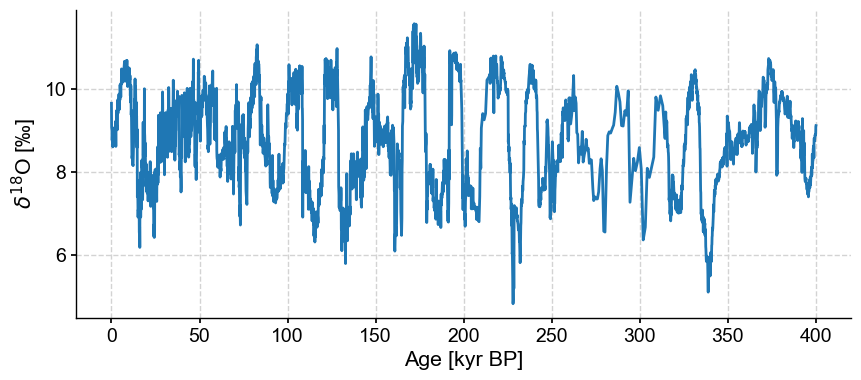

In [6]:
# Download the data from the url
url_Sanbao_composite='https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/Orbital_records/Sanbao_composite.csv'
data = pd.read_csv(pooch.retrieve(url_Sanbao_composite,known_hash=None))

# Create a pyleo.Series
d18O_data = pyleo.Series(
    time=data['age']/1000,
    time_name='Age',
    time_unit='kyr BP',
    value=-data['d18O'],
    value_name=r'$\delta^{18}$O',
    value_unit=u'\u2030'
)
d18O_data.plot()

You may notice that in the figure we just made, the δ<sup>18</sup>O values on the y-axis is plotted with more positive values up, whereas in previous tutorials, we've plotted isotopic data with more negative values up (since more negative/"depleted" suggests warmer temperatures or increased rainfall). However, the pre-processed δ<sup>18</sup>O data that we're using in this tutorial was multipled by -1, so now a more positive/"enriched" value suggests warmer temepratures or increased rainfall. In other words, in this figure, upward on the y-axis is increased monsoon intensity and downward on the y-axis is decreased monsoon intensity.

Let's apply what we learned in the previous tutorial to perform spectral analysis on the speleothem oxygen isotope data. Recall from the previous tutorial that spectral analysis can help us identify dominant cyclicities in the data, which can be useful for assessing potential climate forcings.

We'll use the Weighted Wavelet Z-Transform (WWZ) method as we learned in the previous tutorial:

In [7]:
#Standardize the data
d18O_stnd = d18O_data.interp(step=0.5).standardize() # save it for future use

In [8]:
#Calculate the WWZ spectral analysis
d18O_wwz = d18O_stnd.spectral(method='wwz')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [kyrs]', ylabel='PSD'>)

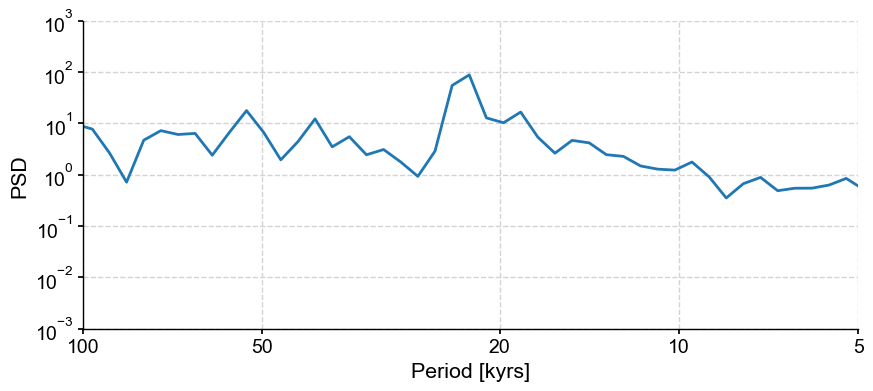

In [9]:
#Plot WWZ results
d18O_wwz.plot(xlim=[100, 5],ylim=[0.001, 1000])

The dominant spectral power is at ~21,000 years. What climate forcing varies on this timescale?

This suggests a link between monsoon intensity and orbital precession! To further explore and confirm this relationship, let's take a look at insolation data and compare this to the speleothem d18O records.


# **Section 2: Constructing insolation curves**

Speleothem records from Asia are often compared to summertime insolation. Recall that insolation is controlled by variations in Earth's orbital cycles (eccentricity, obliquity, precession), so by comparing the d18O record to insolation, we can assess the influence of orbital variations on δ<sup>18</sup>O and monsoon intensity. 

To compute solar insolation, we can use the package [`climlab`](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose. Let's create a time series over the past 400,000 years of changes in summer insolation at 31.67ºN, which is the latitude of Sanbao, the cave from which the speleothem records were produced.


In [10]:
# Specify time interval and units
kyears = np.linspace(-400, 0, 1001 )
# Subset of orbital parameters for specified time
orb = OrbitalTable.interp(kyear=kyears)
days = np.linspace(0, const.days_per_year, 365)
# Generate insolation at Sanbao latitude (31.67)
Qsb = daily_insolation(31.67, days, orb)
# Julian days 152-243 are JJA
Qsb_jja = np.mean(Qsb[:,151:243], axis=1)

Now we can store this data as a `Series` in Pyleoclim and plot the data versus time:

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='JJA Insolation [$W.m^{-2}$]'>)

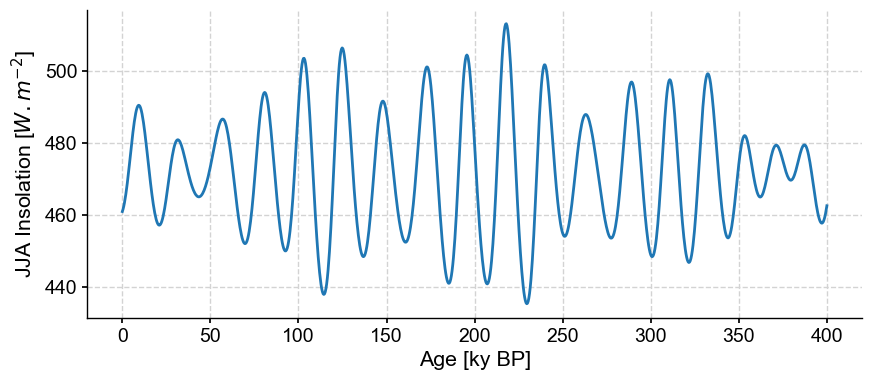

In [11]:
ts_qsb = pyleo.Series(
    time=-kyears,
    time_name='Age',
    time_unit='ky BP',
    value=Qsb_jja,
    value_name='JJA Insolation',
    value_unit=r'$W.m^{-2}$'
)

ts_qsb.plot()

Next, let's plot and compare the speleothem δ<sup>18</sup>O data and the solar insolation data:

(<Figure size 640x480 with 3 Axes>,
 {0: <Axes: ylabel='$\\delta^{18}$O [‰]'>,
  1: <Axes: ylabel='JJA Insolation [$W.m^{-2}$]'>,
  2: <Axes: xlabel='Age [kyr BP]'>})

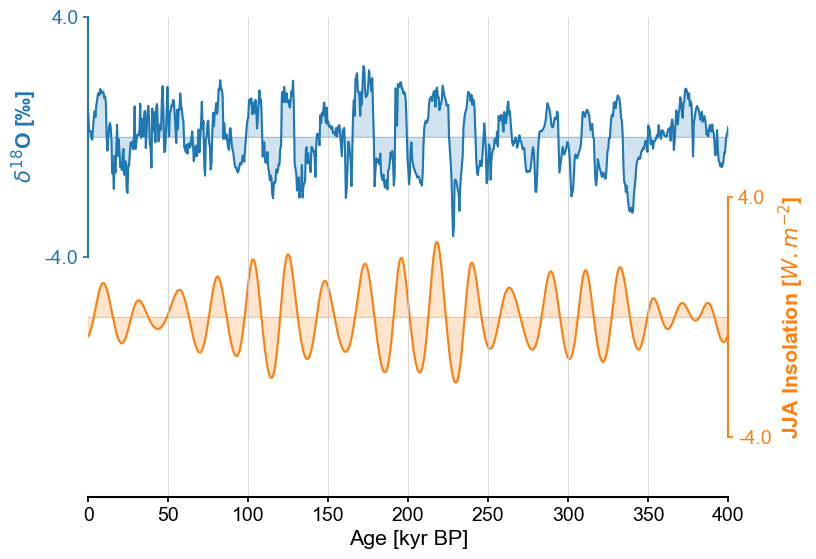

In [12]:
#Standardize the insolation data
ts_qsb_stnd = ts_qsb.standardize()

#Create a MultipleSeries of the speleothem d18O record and insolation data
compare = [d18O_stnd, ts_qsb_stnd]
ms_compare = pyleo.MultipleSeries(compare, time_unit='kyr BP', name=None)

#Create a stackplot to compare the data
ms_compare.stackplot()

By visually comparing the time series of the two records, we can see similarites at orbital scales. To confirm this, we can use spectral analysis to determine the dominant spectral power of the insolation data:

In [13]:
# Standardize the data
ts_qsb_stnd = ts_qsb.standardize()

In [14]:
#Calculate the WWZ spectral analysis
psd_wwz = ts_qsb_stnd.spectral(method='wwz')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [kyrs]', ylabel='PSD'>)

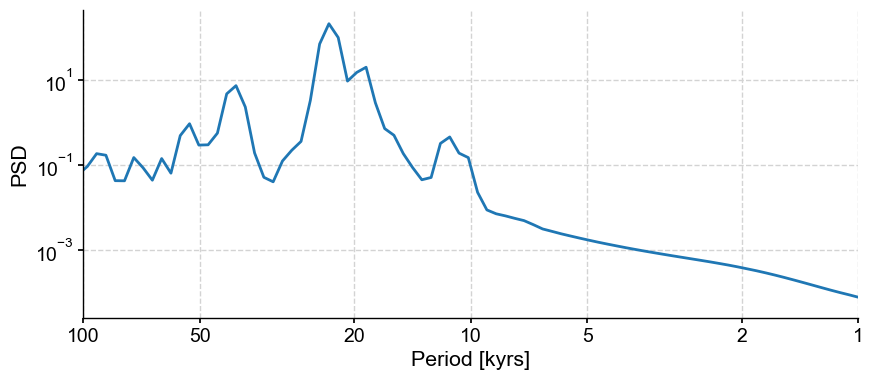

In [15]:
psd_wwz.plot()

Consider the following questions to assess the relationship between solar insolation and monsoon intensity as recorded by the speleothem oxygen isotopes:


*   What is the dominant spectral power in summer insolation at 31ºN latitude? 
*   Is this similar to or different from the dominant spectral power observed in the speleothem δ<sup>18</sup>O record?
*   What might these similarities or differences suggest about the climate forcings driving monsoon intensity in this region?
*   Why might there be a relationship between solar insolation and monsoon intensity? (*Hint: think back to what we learned on W1D1!*).





Similar to the speleothem oxygen isotopes data, the dominant spectral power in summer insolation 31ºN latitude is also ~20,000 years. This confirms the interpretation from the time series comparisons, and suggests a link between monsoon intensity and orbital precession. 

In [16]:
# to_remove explanation

"""
The relationship between solar insolation and monsoon intensity can be explained by the fact that solar insolation affects the temperature gradients between land and sea. During the summer, if there's high solar insolation, the land warms up more than the sea, leading to lower pressure over the land. This low pressure attracts moisture-rich air from the sea, causing the monsoon. Therefore, changes in solar insolation caused by Earth's orbital cycles could influence the intensity of monsoons.
"""

"\nThe relationship between solar insolation and monsoon intensity can be explained by the fact that solar insolation affects the temperature gradients between land and sea. During the summer, if there's high solar insolation, the land warms up more than the sea, leading to lower pressure over the land. This low pressure attracts moisture-rich air from the sea, causing the monsoon. Therefore, changes in solar insolation caused by Earth's orbital cycles could influence the intensity of monsoons.\n"

# **Summary**

In this tutorial, you've gained valuable insights into the complex world of paleoclimatology and climate forcings. Here's a recap of what you've learned:
* You've discovered how to plot and interpret temperature reconstructions derived from speleothem oxygen isotopes. This involved downloading and visualizing speleothem δ18O data, which are interpreted to reflect continental-scale monsoon circulations. You learned how these isotopes indicate changes in monsoon intensity.
* You've assessed the orbital forcings on monsoon intensity over the past 400,000 years using spectral analysis. This helped you identify dominant cyclicities in the speleothem oxygen isotope data and insolation data, revealing a link between monsoon intensity and orbital precession.
* By comparing the δ18O record to insolation, you've developed a deeper understanding of the relationship between solar insolation and monsoon intensity

Overall, this tutorial has equipped you with the skills and knowledge to assess climate variations observed in paleoclimate records, a crucial aspect of understanding past, present, and future climate dynamics​.